In [227]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

In [228]:
def load_data():
    path = "./data/iris.data"
    df = pd.read_fwf(path, header = None)
    df = df[0].str.split(',',expand = True)
    df.iloc[ : , : 4] = df.iloc[ : , : 4].astype(float)
    return df

In [229]:
def label_encoding(y):
    labelencoder = LabelEncoder()
    y = labelencoder.fit_transform(y)
    return y

In [230]:
def draw_Avg(df):
    avg = df.iloc[ : , : 4].mean()
    colors = ['red', 'green', 'blue', 'pink']
    feature = ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"]
    index = ['0', '1', '2', '3']
    
    x = range(4)
    for i in range(4):
        plt.bar(index[i], avg[i], color = colors[i], label = feature[i])
    
    plt.title("Average")
    plt.legend()
    plt.show()

In [231]:
def draw_Std(df):
    Std = df.iloc[ : , : 4].std()
    colors = ['red', 'green', 'blue', 'pink']
    feature = ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"]
    index = ['0', '1', '2', '3']
    
    x = range(4)
    for i in range(4):
        plt.bar(index[i], Std[i], color = colors[i], label = feature[i])
    
    plt.title("Standard Deviation")
    plt.legend()
    plt.show()

In [232]:
def draw_ValueCount(df):
    for i in range(4):
        feature = ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"]
        
        print("Feature \"{}\":".format(feature[i]))
        
        freq = df[i].value_counts().sort_index()
        freq.plot.hist()
        plt.title("Value Count (Total)")
        plt.show()
        
        df_I_s = df[(df[4] == "Iris-setosa")]
        freq_I_s = df_I_s[i].value_counts().sort_index()
        freq_I_s.plot.hist()
        plt.title("Value Count (Label is \"Iris-setosa\")")
        plt.show()
        
        print(":")
        df_I_ve = df[(df[4] == "Iris-versicolor")]
        freq_I_ve = df_I_ve[i].value_counts().sort_index()
        freq_I_ve.plot.hist()
        plt.title("Value Count (Label is \"Iris-versicolor\")")
        plt.show()
        
        df_I_vi = df[(df[4] == "Iris-virginica")]
        freq_I_vi = df_I_vi[i].value_counts().sort_index()
        freq_I_vi.plot.hist()
        plt.title("Value Count (Label is \"Iris-virginica\")")
        plt.show()

In [233]:
def Gaussian(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test, y_test)

In [234]:
def holdout_validation(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 
    
    train_score, test_score = Gaussian(X_train, X_test, y_train, y_test)
    
    print("Training set score(holdout validation): {}".format(train_score))
    print("Testing set score(holdout validation): {}".format(test_score))

In [235]:
def k_fold(X, y):
    kf = KFold(n_splits = 3)
    
    total_train_score, total_test_score = np.array([]), np.array([])
    
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        
        train_score, test_score = Gaussian(X_train, X_test, y_train, y_test)

        total_train_score = np.append(total_train_score, train_score)
        total_test_score = np.append(total_test_score, test_score)

    print("Training set average score(K-fold cross-validation): {}".format(np.mean(total_train_score)))
    print("Testing set average score(K-fold cross-validation): {}".format(np.mean(total_test_score)))    

In [236]:
df = load_data()
df = shuffle(df) #index也洗了（在data裡一定有至少一筆相同的資料，但index不一定是原本的index）
X = df.drop(columns=[4]) #把feature提取出來
y = df[4] #label 
X = X.to_numpy()
y = label_encoding(y) #already array type

holdout_validation(X, y)
k_fold(X, y)

Training set score(holdout validation): 0.9523809523809523
Testing set score(holdout validation): 0.9777777777777777
Training set average score(K-fold cross-validation): 0.9633333333333333
Testing set average score(K-fold cross-validation): 0.9533333333333333


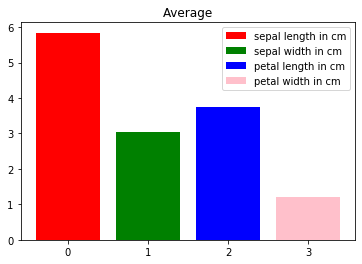

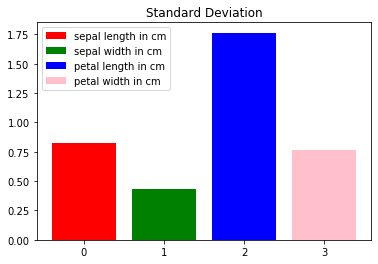

Feature "sepal length in cm":


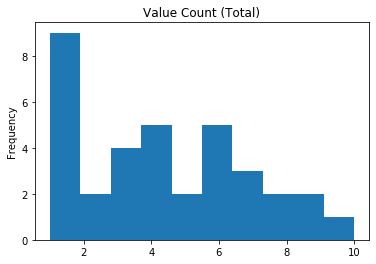

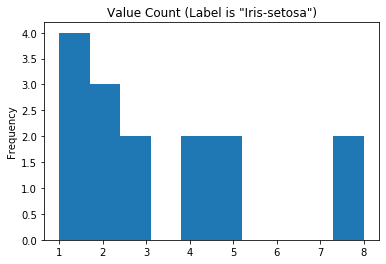

:


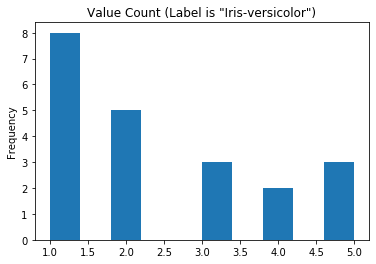

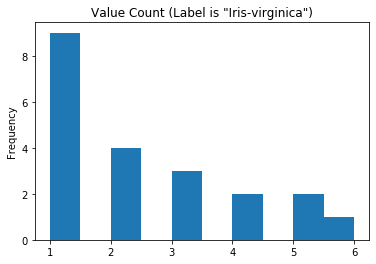

Feature "sepal width in cm":


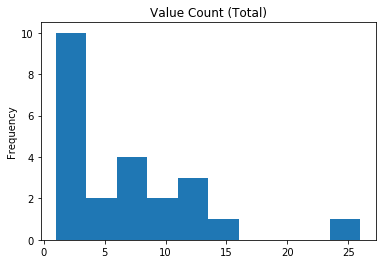

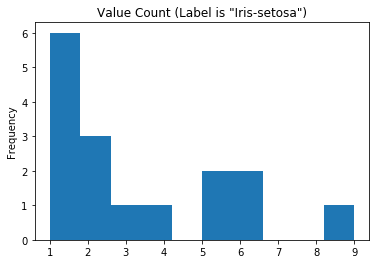

:


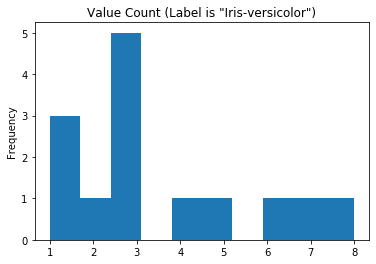

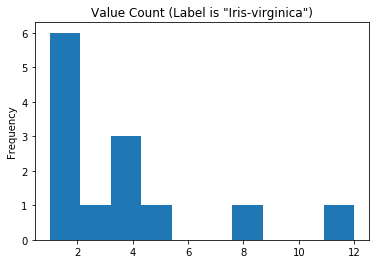

Feature "petal length in cm":


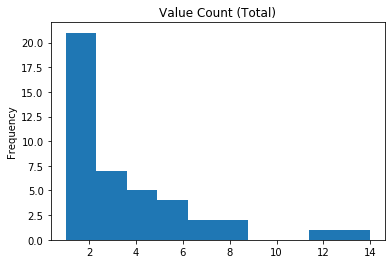

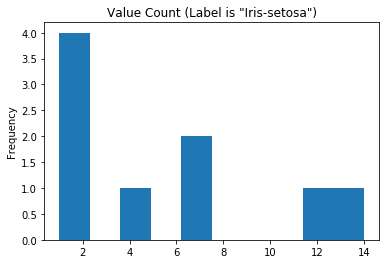

:


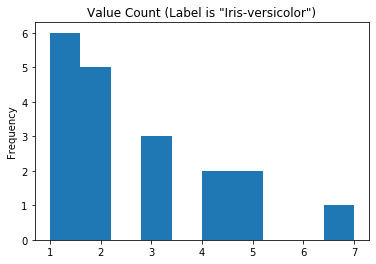

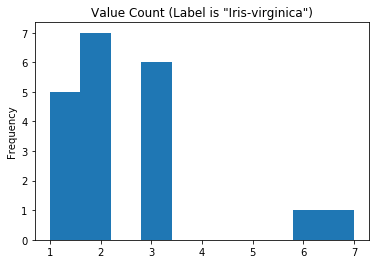

Feature "petal width in cm":


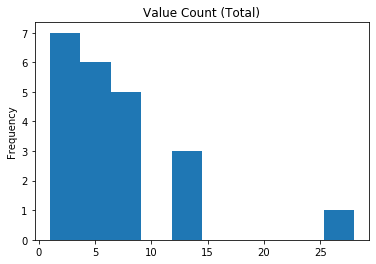

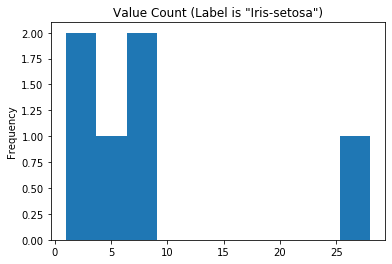

:


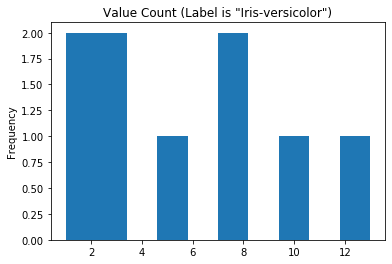

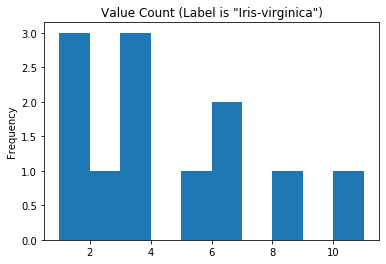

In [237]:
draw_Avg(df)
draw_Std(df)
draw_ValueCount(df)